In [1]:
base_path = '/Users/rudra/Tech/coursera_ml_specialization/supervised_ml/week2_course_materials/home/jovyan/work'
import sys
sys.path.insert(0, base_path)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from lab_utils_multi import load_house_data
from lab_utils_common import dlc
np.set_printoptions(precision=2)
plt.style.use(f"{base_path}/deeplearning.mplstyle")

Load the data

In [6]:
X_train, y_train = load_house_data()
X_features = ['size(sqft)', 'bedrooms', 'floors', 'age']
X_train.shape, y_train.shape

((99, 4), (99,))

Normalize the training data

In [7]:
scaler = StandardScaler()
X_norm = scaler.fit_transform(X_train)
X_norm.shape

(99, 4)

In [8]:
print(f"Peak to peak range by column in Raw X: {np.ptp(X_train, axis=0)}")
print(f"Peak to peak range by column in Normalized X: {np.ptp(X_norm, axis=0)}")

Peak to peak range by column in Raw X: [2.41e+03 4.00e+00 1.00e+00 9.50e+01]
Peak to peak range by column in Normalized X: [5.85 6.14 2.06 3.69]


Create and fit the Regression model

In [10]:
sgdr = SGDRegressor(max_iter=1000)
sgdr.fit(X_norm, y_train)
print(sgdr)

print(f"Number of iterations completed: {sgdr.n_iter_}")
print(f"Number of weight updates: {sgdr.t_}")

SGDRegressor()
Number of iterations completed: 139
Number of weight updates: 13762.0


View parameters of trained model

In [11]:
b_norm = sgdr.intercept_
w_norm = sgdr.coef_

print(f"Model parameters: w={w_norm}, b={b_norm}")

Model parameters: w=[110.28 -21.11 -32.56 -38.02], b=[363.17]


Model Predictions

In [13]:
# Predictions by SGDRegressor
y_pred_sgd = sgdr.predict(X_norm)
# Predictions using linear regression of X_norm, w_norm and b_norm
y_pred = np.dot(X_norm, w_norm) + b_norm

print(f"Predictions using sgdr.predict and np.dot matches? : {(y_pred_sgd == y_pred).all()}")

Predictions using sgdr.predict and np.dot matches? : True


In [14]:
print(f"Sample Predictions on training data: {y_pred_sgd[:4]}")
print(f"Sample target values: {y_train[:4]}")

Sample Predictions on training data: [295.21 485.93 389.58 492.09]
Sample target values: [300.  509.8 394.  540. ]


Plotting the results

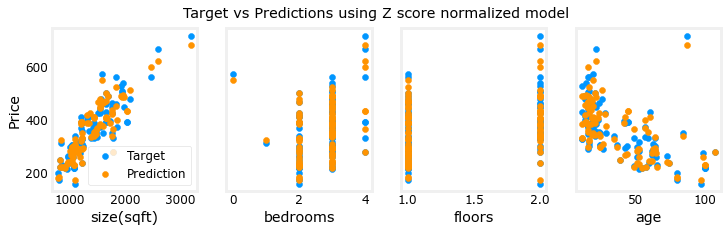

In [17]:
fig, ax = plt.subplots(1, 4, figsize=(12,3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i], y_train, label='Target')
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_train[:,i], y_pred_sgd, color=dlc['dlorange'], label='Prediction')
ax[0].set_ylabel('Price')
ax[0].legend()
fig.suptitle('Target vs Predictions using Z score normalized model')
plt.show()